/usr/local/lib/python3.9/site-packages/paramiko/transport.py:236: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


Text(0, 0.5, 'login_user_count')

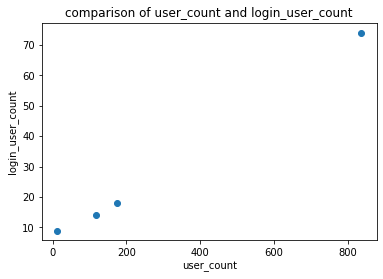

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from database.mysql_manager import MysqlManager

mysql = MysqlManager()
mysql.start_server()
conn = mysql.db_connect()
curs = conn.cursor()
sql = """
SELECT user_count, login_user_count
FROM (
	SELECT site_id, MAX(login_count) login_user_count FROM pass_monthly_login_user_counts GROUP BY site_id
) login_user_counts
JOIN (
	SELECT site_id, count(*) user_count FROM pass_users GROUP BY site_id
) user_counts
ON login_user_counts.site_id = user_counts.site_id
"""
numrows = curs.execute(sql)
result = np.fromiter(
    curs.fetchall(),
    count=numrows,
    dtype=("int64,int64"),
)
curs.close
conn.close
mysql.close_server()

x = result["f0"]
y = result["f1"]

plt.scatter(x, y)
plt.title("comparison of user_count and login_user_count")
plt.xlabel("user_count")
plt.ylabel("login_user_count")